In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=10, suppress=True)

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [7]:
# dataset
dataset = pd.read_csv('new.csv',nrows=60000,low_memory=False)
train_set, test_set = train_test_split(dataset.values, test_size=0.25, random_state=42)

train_X = train_set[:,3:]
test_X = test_set[:,3:]

train_Y = train_set[:,1]
test_Y = test_set[:,1]

train_X = np.expand_dims(train_X, axis=1)
test_X = np.expand_dims(test_X, axis=1)

In [8]:
train_Y.mean()

7939.0215333333335

In [9]:
model = tf.keras.models.Sequential([
    layers.Conv1D(filters=8, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l2(0.0001),input_shape=(train_X.shape[1:])),
    layers.Conv1D(filters=8, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l2(0.0001)),
    layers.Conv1D(filters=8, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l2(0.0001)),
    layers.MaxPooling1D(padding='same'),
    layers.Flatten(),
#    layers.Dense(1000 , activation="relu",kernel_regularizer=l2(0.0001)),#kernel_initializer="he_normal", input_shape=train_X.shape[1:]),
    layers.Dense(500 , activation="relu",kernel_regularizer=l2(0.0001)),#kernel_initializer="he_normal", input_shape=train_X.shape[1:]),
    layers.Dense(200 , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=(8,32)),
    layers.Dense(100 , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
#    layers.Dense(75  , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(50  , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(20  , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(1)])#,kernel_initializer="he_normal")])


In [10]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss="mean_squared_error", optimizer=opt,metrics=['mae'])
history = model.fit(train_X,train_Y, validation_data=(test_X,test_Y),epochs=20,batch_size = 35, shuffle=True)

Epoch 1/20
1286/1286 [==============================] - 4s 2ms/step - loss: 129702.3203 - mae: 235.3602 - val_loss: 18513.1973 - val_mae: 99.9444
Epoch 2/20
1286/1286 [==============================] - 3s 2ms/step - loss: 16182.1201 - mae: 91.4497 - val_loss: 14663.0879 - val_mae: 87.0491
Epoch 3/20
1286/1286 [==============================] - 3s 2ms/step - loss: 14157.7344 - mae: 84.0394 - val_loss: 13859.7178 - val_mae: 84.9961
Epoch 4/20
1286/1286 [==============================] - 3s 2ms/step - loss: 13219.7393 - mae: 80.1825 - val_loss: 12629.6631 - val_mae: 79.0000
Epoch 5/20
1286/1286 [==============================] - 3s 2ms/step - loss: 12612.7148 - mae: 77.7458 - val_loss: 12879.4785 - val_mae: 80.6189
Epoch 6/20
1286/1286 [==============================] - 3s 2ms/step - loss: 12179.8125 - mae: 76.0487 - val_loss: 12275.0967 - val_mae: 78.1048
Epoch 7/20
1286/1286 [==============================] - 3s 2ms/step - loss: 11797.8975 - mae: 74.6254 - val_loss: 11765.7041 - val_mae

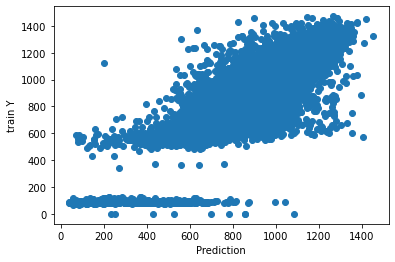

In [11]:
plt.scatter(model.predict(train_X),train_Y)
plt.xlabel("Prediction")
plt.ylabel("train Y")
plt.show()

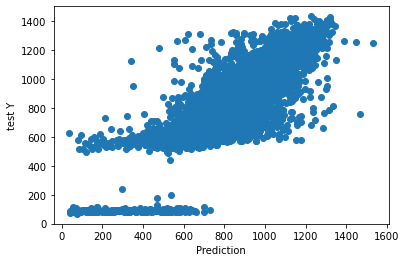

In [12]:
plt.scatter(model.predict(test_X),test_Y)
plt.xlabel("Prediction")
plt.ylabel("test Y")
plt.show()

In [64]:
model = tf.keras.models.Sequential([
    layers.Conv1D(filters=8, kernel_size=10, padding='same', activation="relu", kernel_regularizer=l2(0.0001),input_shape=(train_X.shape[1:])),
    layers.MaxPooling1D(padding='same'),
    layers.Conv1D(filters=16, kernel_size=5, padding='same', activation="relu", kernel_regularizer=l2(0.0001),input_shape=(train_X.shape[1:])),
    layers.MaxPooling1D(padding='same'),
#    layers.Conv1D(filters=32, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l2(0.0001),input_shape=(train_X.shape[1:])),
#    layers.MaxPooling1D(padding='same'),
    layers.Flatten(),
#    layers.Dense(1000 , activation="relu",kernel_regularizer=l2(0.0001)),#kernel_initializer="he_normal", input_shape=train_X.shape[1:]),
    layers.Dense(500 , activation="relu",kernel_regularizer=l2(0.0001)),#kernel_initializer="he_normal", input_shape=train_X.shape[1:]),
    layers.Dense(200 , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=(8,32)),
    layers.Dense(100 , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(50  , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(20  , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(1)])#,kernel_initializer="he_normal")])


In [65]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss="mean_squared_error", optimizer=opt,metrics=['mae'])
history = model.fit(train_X,train_Y, validation_data=(test_X,test_Y),epochs=20,batch_size = 35, shuffle=True)

Epoch 1/20
1286/1286 [==============================] - 3s 2ms/step - loss: 15141136.0000 - mae: 2669.9792 - val_loss: 2815942.0000 - val_mae: 1263.7625
Epoch 2/20
1286/1286 [==============================] - 2s 2ms/step - loss: 2399309.2500 - mae: 1144.7997 - val_loss: 2041563.5000 - val_mae: 1053.8192
Epoch 3/20
1286/1286 [==============================] - 2s 2ms/step - loss: 1840557.5000 - mae: 987.1120 - val_loss: 1632806.3750 - val_mae: 932.0627
Epoch 4/20
1286/1286 [==============================] - 2s 2ms/step - loss: 1550495.2500 - mae: 893.4792 - val_loss: 1467894.2500 - val_mae: 876.6424
Epoch 5/20
1286/1286 [==============================] - 2s 2ms/step - loss: 1435414.5000 - mae: 849.4525 - val_loss: 1402614.6250 - val_mae: 846.3847
Epoch 6/20
1286/1286 [==============================] - 2s 2ms/step - loss: 1374548.2500 - mae: 825.1337 - val_loss: 1347185.7500 - val_mae: 824.6995
Epoch 7/20
1286/1286 [==============================] - 2s 2ms/step - loss: 1334822.3750 - mae:

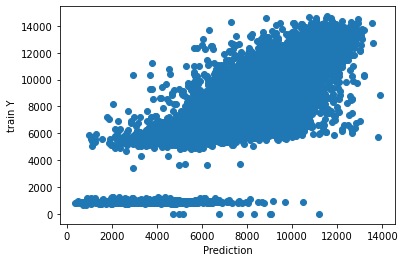

In [66]:
plt.scatter(model.predict(train_X),train_Y)
plt.xlabel("Prediction")
plt.ylabel("train Y")
plt.show()

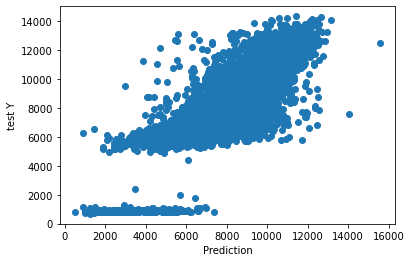

In [67]:
plt.scatter(model.predict(test_X),test_Y)
plt.xlabel("Prediction")
plt.ylabel("test Y")
plt.show()